# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



# IMPORT LIBRARIES AND DATASET

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

In [2]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [3]:
# View the head of the training dataset
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Get the data statistics for each column in the dataframe
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
# Get the datatype of each column (might be used while data cleaning)
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
# Show the columns having null elements in it
avocado_df.isnull() # no null elements

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# EXPLORE DATASET  

In [7]:
# Sort the data according to the date
avocado_df = avocado_df.sort_values('Date')

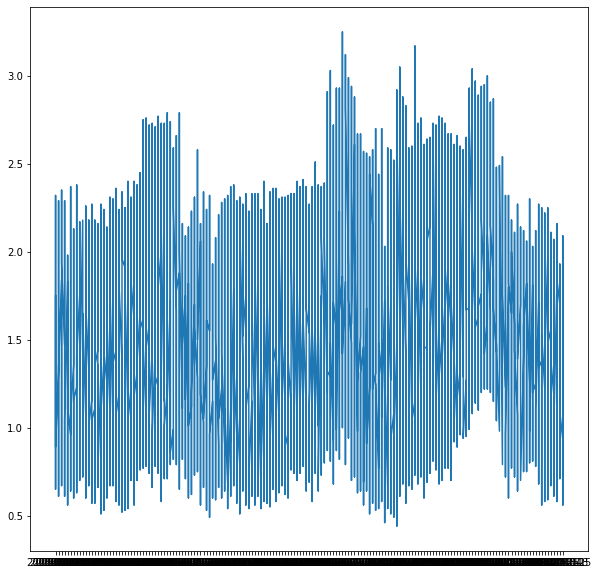

In [8]:
# Plot date and average price
plt.figure(figsize= (10, 10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

# NOTE: Sorting is mandatory to have a meaningful visualization

C:\Users\natar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

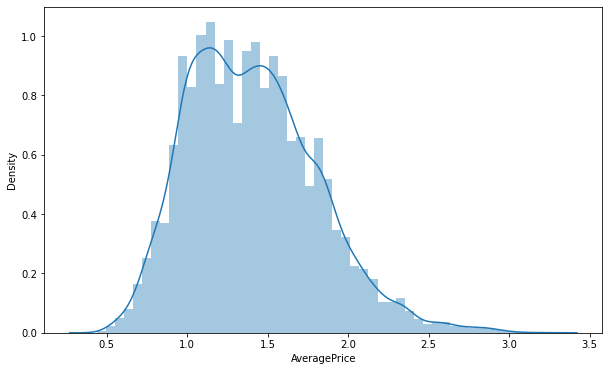

In [9]:
# Plot distribution of the average price
plt.figure(figsize= (10, 6))
sns.distplot(avocado_df['AveragePrice'])

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

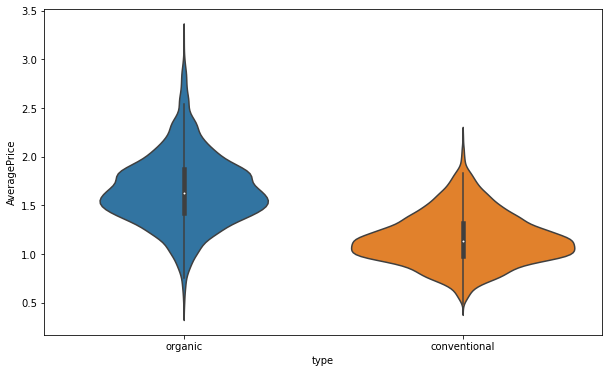

In [10]:
# Plot a violin plot of the average price vs. avocado type
plt.figure(figsize= (10, 6))
sns.violinplot(y= 'AveragePrice', x = 'type', data = avocado_df)

# Different distribution is oberserved for different avocado type - mean, 3std width
# are also represented

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

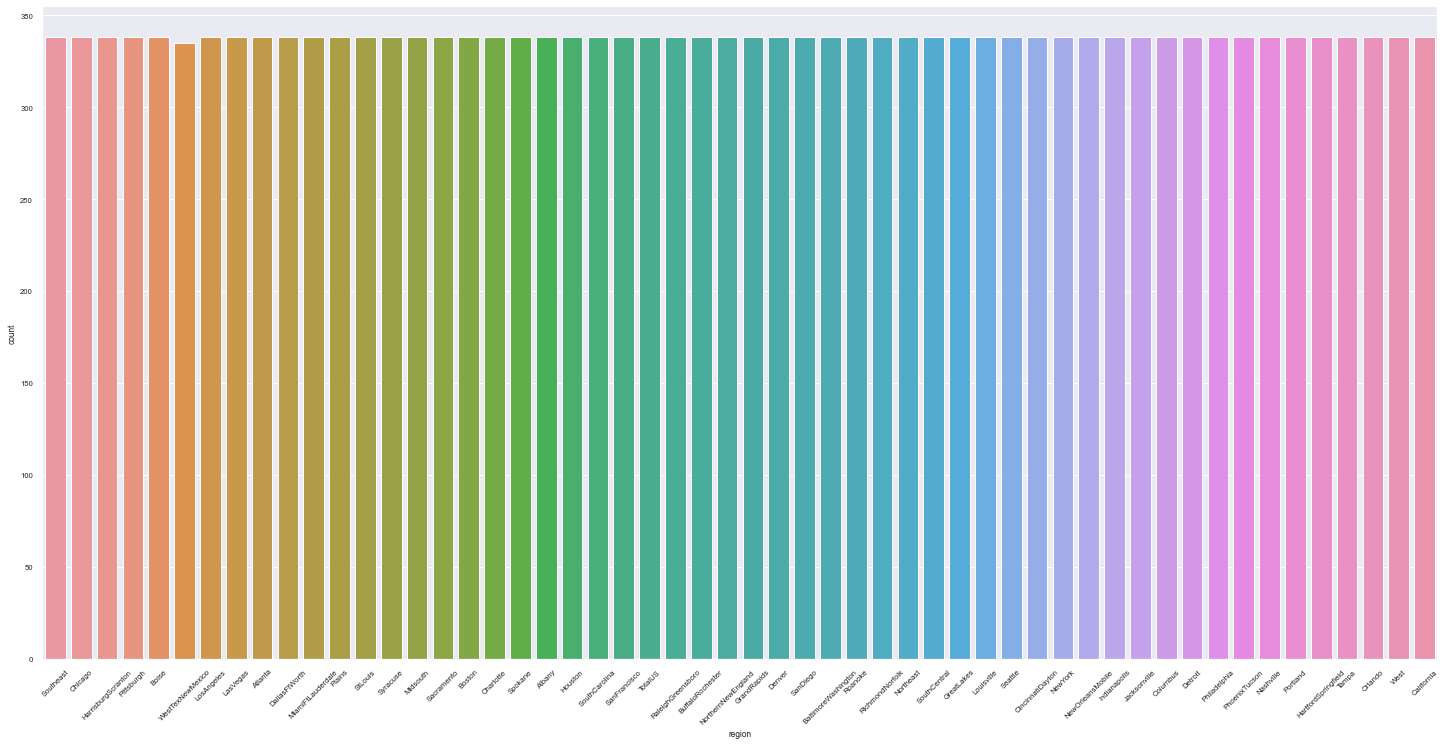

In [11]:
# Bar Chart to indicate the number of regions

sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

# We could see that there is not much skewing and the data is distributed
# almost evenly among all regions

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

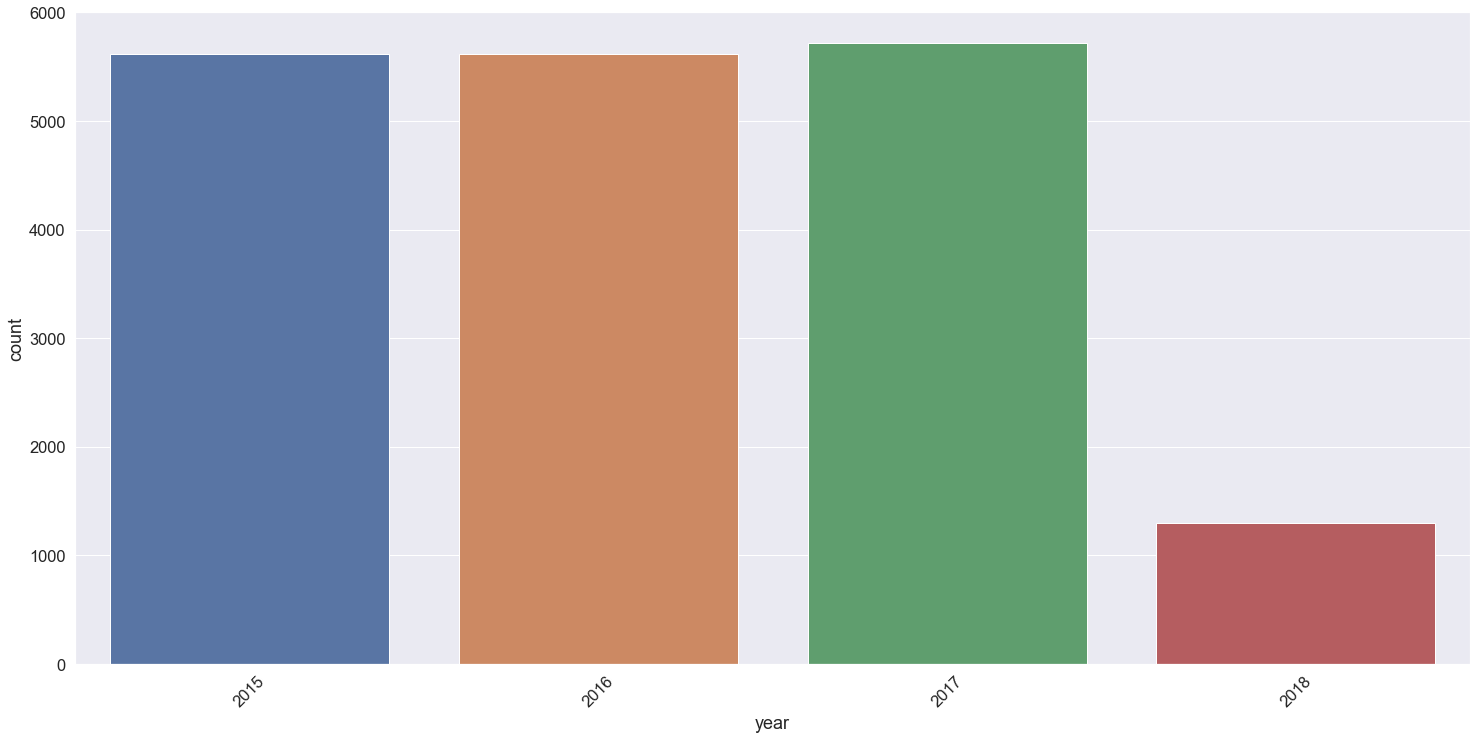

In [12]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

# In 2015-2017 we have almost same number of samples. 2018 however has 
# very low count

C:\Users\natar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


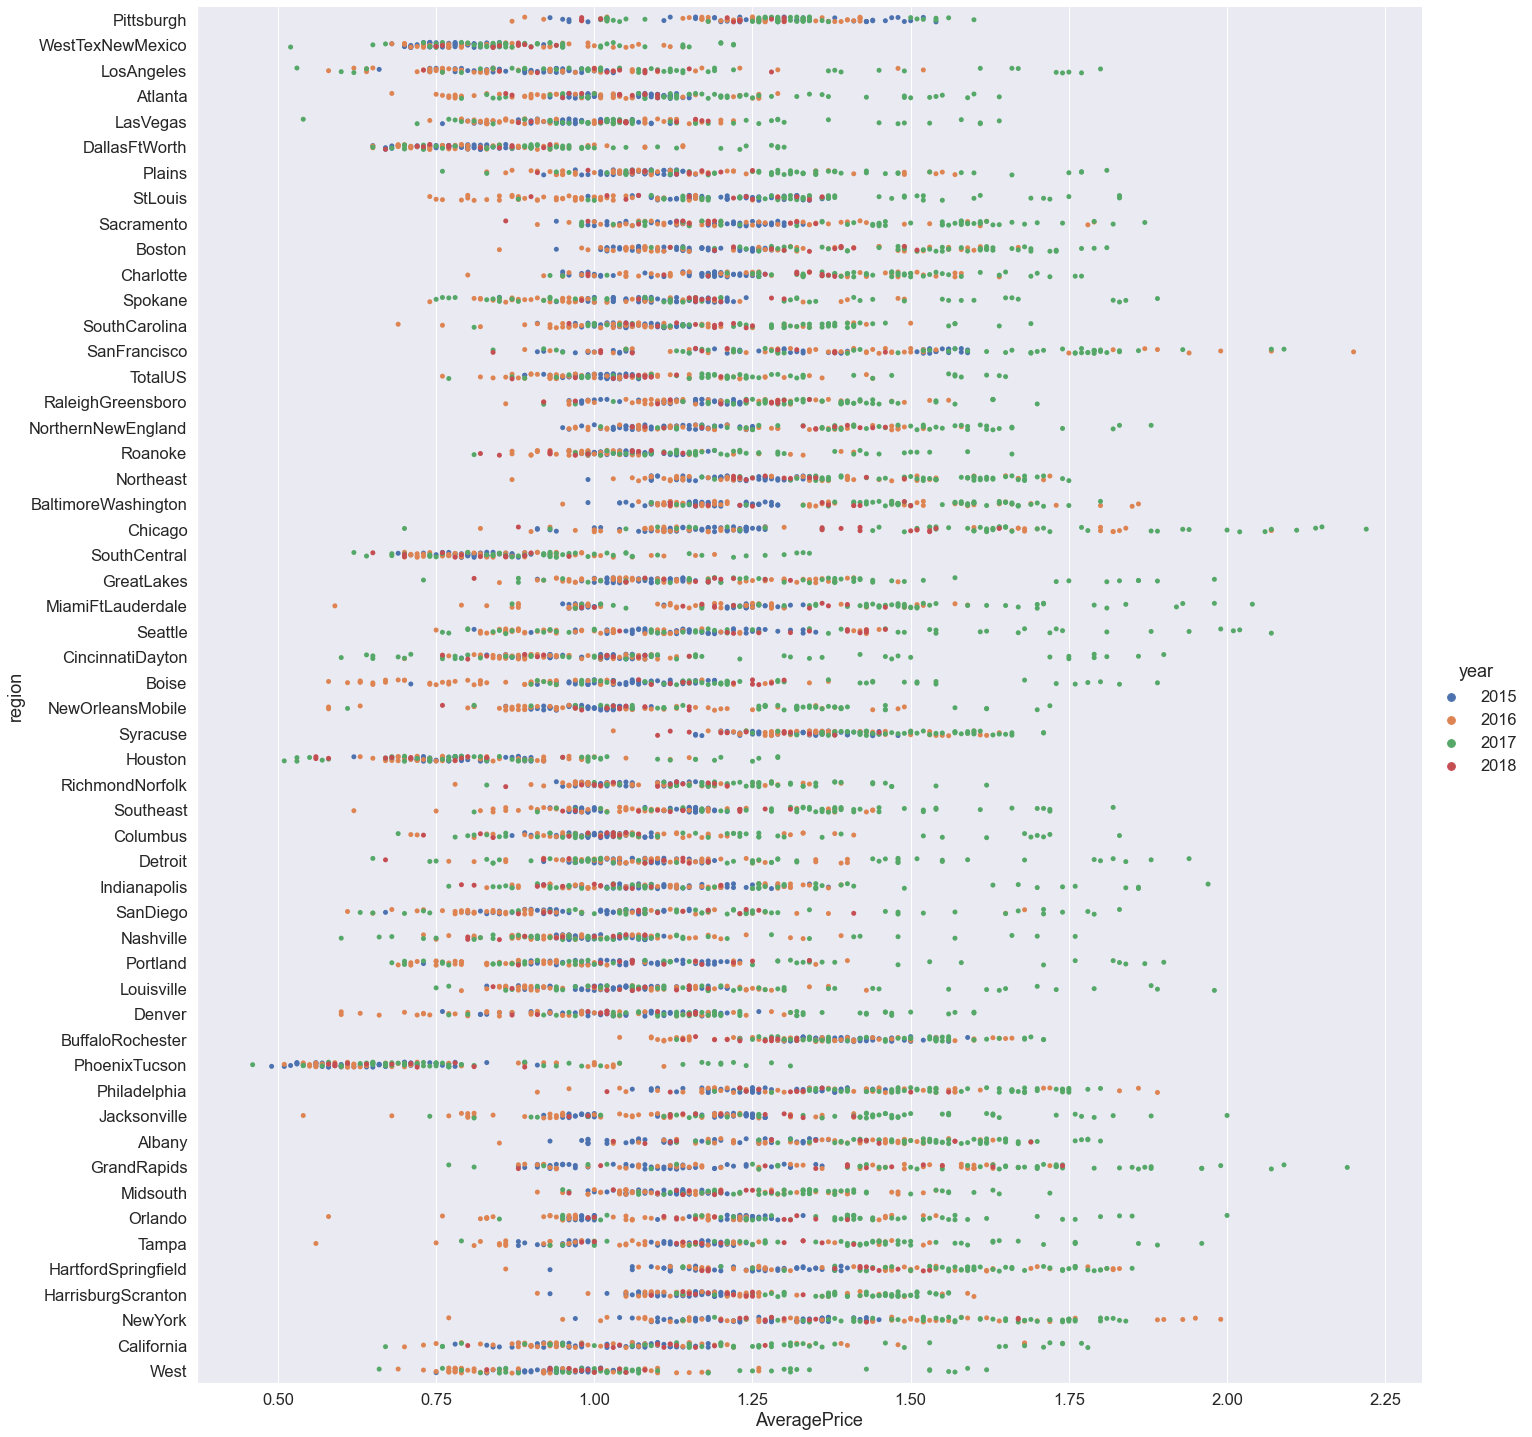

In [13]:
 # plot the avocado prices vs. regions for conventional avocados
conventional = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type'] == 'conventional'],
                          hue = 'year', height = 20)

# Distribution of prices for different years across different regions as well
# example interpretation: Chicago has recorded the higest price for 
#                         conventional type avocados in the year 2017

C:\Users\natar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


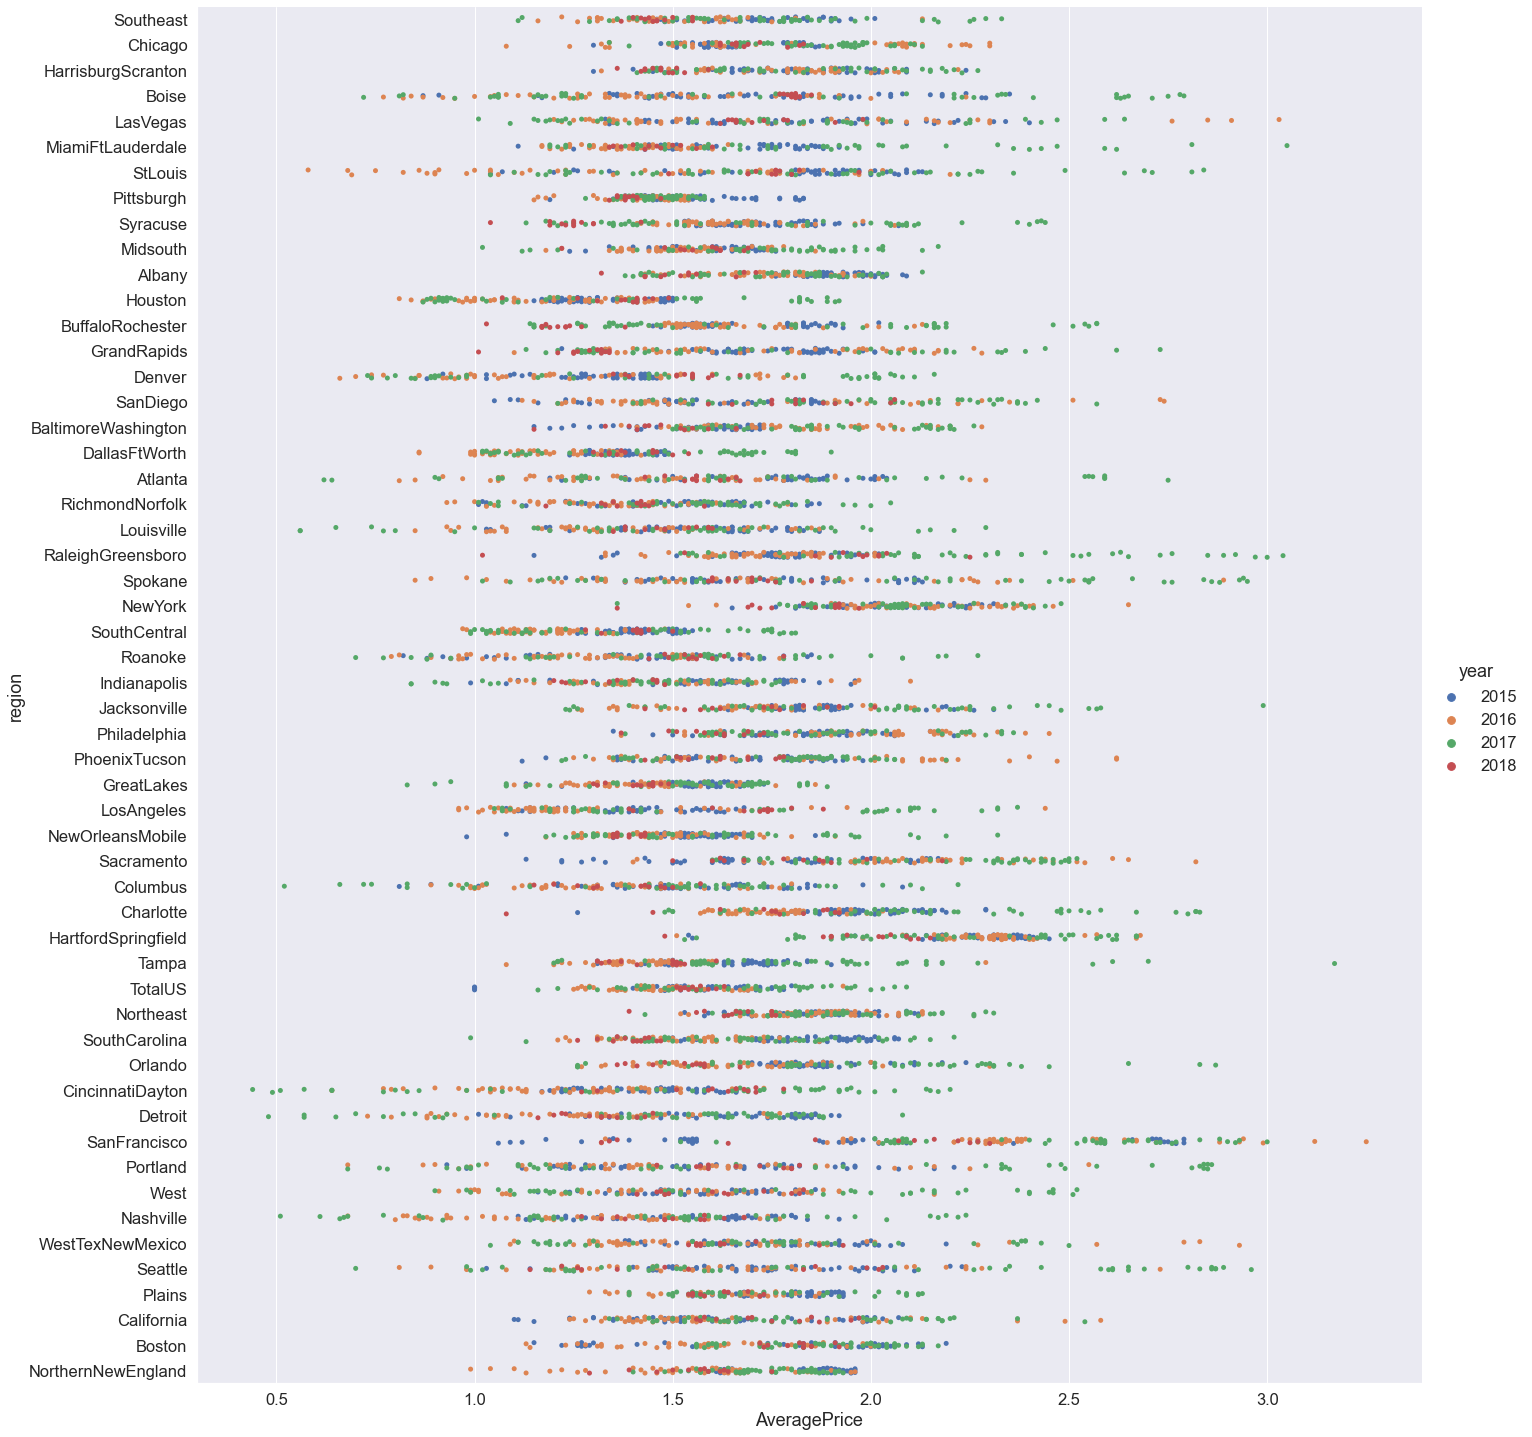

In [14]:
  # plot the avocado prices vs. regions for organic avocados
organic = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type'] == 'organic'],
                          hue = 'year', height = 20)

# PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [15]:
# divide the data that will be given to prophet model
avocado_prophet_df = avocado_df[["Date","AveragePrice"]]

In [16]:
# Rename the columns in the prophet data set as required by fbprophet
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [17]:
# View the data to make sure the data is ready for using fbprophet on it
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


# DEVELOP MODEL AND MAKE PREDICTIONS

## fbprophet implements additive regression model with four elements
### 1. A piecewise linear component
### 2. A yearly sesonal component modeled using Fourier series
### 3. A weekly sesonal component
### 4. A holiday list that can be manually provided

## Used for planning and forecasting
## No cleaning needed (pre-processing)

In [18]:
# instantiate the object
m = Prophet()
m.fit(avocado_prophet_df) # fit the model with our triaining data

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
# Forcasting into the future, get the future dataframes
future = m.make_future_dataframe(periods = 365) # to predict one year ahead
forecast = m.predict(future)

In [20]:
# To look at the forecasted datframe
forecast

# generate the trend along with its confidence, additive and 
# the multiplicative terms

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496718,0.916313,1.891762,1.496718,1.496718,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,0.0,0.0,0.0,1.383920
1,2015-01-11,1.491718,0.881193,1.864977,1.491718,1.491718,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,0.0,0.0,0.0,1.387427
2,2015-01-18,1.486719,0.916542,1.844590,1.486719,1.486719,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,0.0,0.0,0.0,1.382728
3,2015-01-25,1.481720,0.866108,1.866117,1.481720,1.481720,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,0.0,0.0,0.0,1.358678
4,2015-02-01,1.476721,0.855213,1.795086,1.476721,1.476721,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,0.0,0.0,0.0,1.325199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.164538,0.574680,1.580243,0.985884,1.353642,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,0.0,0.0,0.0,1.078120
530,2019-03-22,1.163813,0.553326,1.622145,0.984255,1.353755,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,0.0,0.0,0.0,1.079065
531,2019-03-23,1.163088,0.557127,1.614943,0.982627,1.353868,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,0.0,0.0,0.0,1.080283
532,2019-03-24,1.162363,0.546122,1.578973,0.980879,1.353973,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,0.0,0.0,0.0,1.081756


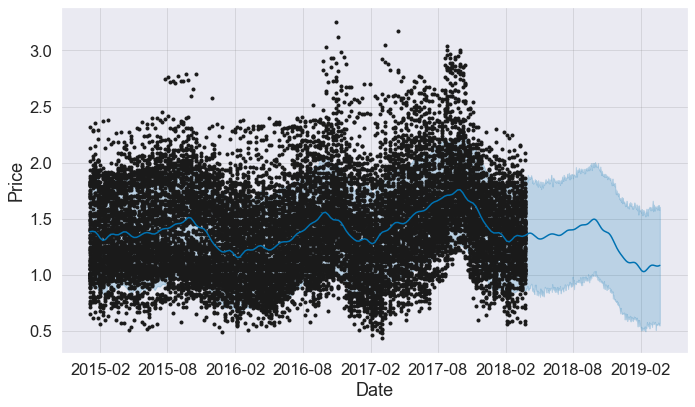

In [21]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

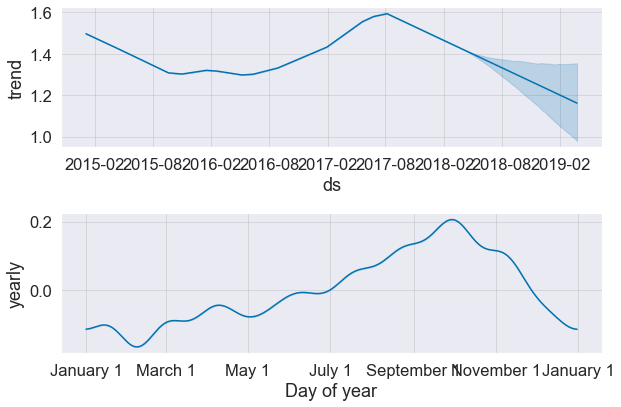

In [22]:
figure2 = m.plot_components(forecast)

# gives the trend throughout the year
# gives expected price

# DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC)

In [23]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')

In [24]:
# Select specific region
avocado_df_sample_west = avocado_df[avocado_df['region'] == 'West']

In [25]:
avocado_df_sample_west

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


In [26]:
# sort the data according to date
avocado_df_sample_west = avocado_df_sample_west.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


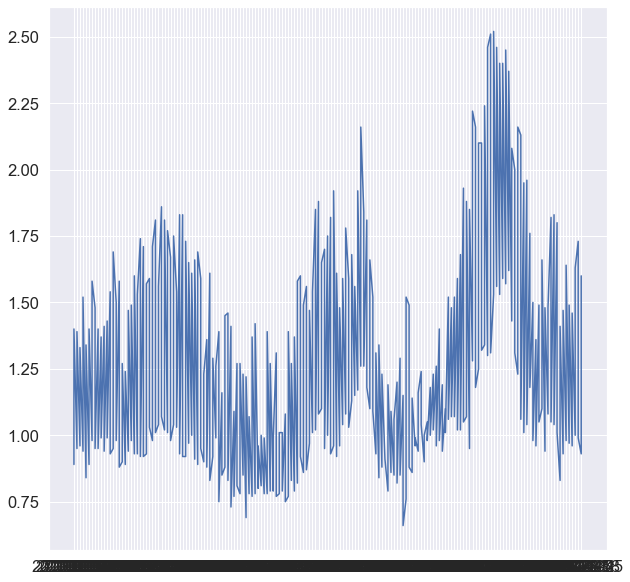

In [27]:
plt.figure(figsize = (10, 10))
plt.plot(avocado_df_sample_west['Date'], avocado_df_sample_west['AveragePrice'])

In [28]:
# change the column name to use fbprophet
avocado_df_sample_west = avocado_df_sample_west.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [29]:
m = Prophet()
m.fit(avocado_df_sample_west)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


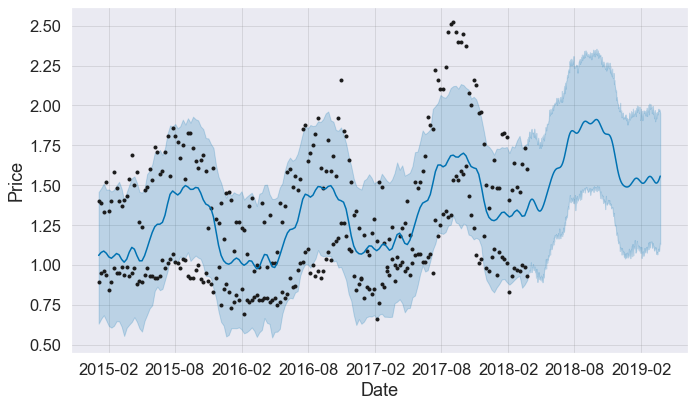

In [30]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

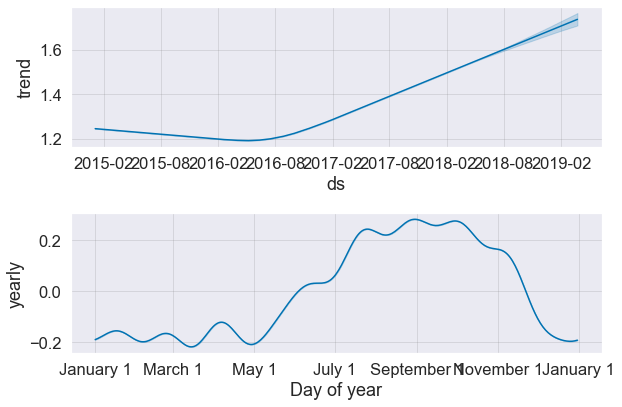

In [31]:
figure3 = m.plot_components(forecast)

## EVALUATION

In [32]:
# Take the West data and remove the last 9 rows, then let the model predict the future in 'yhat' of the dataframe given
# by prophet. Calculating the mean squared error between the original and the predicted values will give the accuracy

avocado_df_eval = avocado_df[avocado_df['region'] == 'West'] # extract the west data
avocado_df_eval = avocado_df_eval.sort_values('Date') # sort the values according to the date (mandatory)
avocado_df_eval = avocado_df_eval.drop_duplicates('Date') # remove the duplicates w.r.t date

In [33]:
# column name as per required by fbprophet

avocado_df_eval = avocado_df_eval.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [34]:
# seperate the training and the testing data

train_data = avocado_df_eval.drop(avocado_df_eval.index[-9:])
train_data

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015,West
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,2017-12-24,1.10,5116876.57,1773530.98,1202037.28,89973.68,2051334.63,1124779.76,915774.05,10780.82,conventional,2017,West
8372,0,2017-12-31,0.94,6330634.55,1789024.92,2089553.44,91527.19,2360529.00,1117482.22,1235496.72,7550.06,conventional,2017,West
9113,11,2018-01-07,1.08,6358768.95,2061960.91,1706532.52,108441.55,2481833.97,1175889.89,1291212.75,14731.33,conventional,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


In [35]:
test_data = avocado_df_eval[-9:]
test_data

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
9109,7,2018-02-04,0.83,10565056.41,3121272.58,3294335.87,142553.21,4006894.75,1151399.33,2838239.39,17256.03,conventional,2018,West
9108,6,2018-02-11,0.93,7463494.79,2646176.67,1633418.28,109146.92,3074752.92,1203367.03,1856207.85,15178.04,conventional,2018,West
9107,5,2018-02-18,0.98,6783106.02,2511897.38,1645249.93,107420.55,2518538.16,1311830.11,1187897.07,18810.98,conventional,2018,West
9106,4,2018-02-25,0.97,7408451.31,2154414.96,1740237.35,117766.27,3396032.73,1164132.42,2205336.14,26564.17,conventional,2018,West
9105,3,2018-03-04,0.96,7371498.76,2676545.90,1748192.04,118365.31,2828395.51,1432984.96,1379886.53,15524.02,conventional,2018,West
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [37]:
# build the model and predict the next 9 values
model = Prophet()
model.fit(train_data)
# Forcasting into the future
future_sample = model.make_future_dataframe(periods = 9)
forecast_sample = model.predict(future_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
forecast_sample

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.166489,0.540086,1.300803,1.166489,1.166489,-0.237809,-0.237809,-0.237809,-0.237809,-0.237809,-0.237809,0.0,0.0,0.0,0.928680
1,2015-01-11,1.166424,0.618763,1.377249,1.166424,1.166424,-0.152997,-0.152997,-0.152997,-0.152997,-0.152997,-0.152997,0.0,0.0,0.0,1.013427
2,2015-01-18,1.166359,0.700323,1.489934,1.166359,1.166359,-0.081685,-0.081685,-0.081685,-0.081685,-0.081685,-0.081685,0.0,0.0,0.0,1.084674
3,2015-01-25,1.166294,0.670784,1.430287,1.166294,1.166294,-0.113239,-0.113239,-0.113239,-0.113239,-0.113239,-0.113239,0.0,0.0,0.0,1.053056
4,2015-02-01,1.166229,0.569083,1.305462,1.166229,1.166229,-0.230006,-0.230006,-0.230006,-0.230006,-0.230006,-0.230006,0.0,0.0,0.0,0.936223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-01-26,1.509952,0.990405,1.746253,1.509952,1.509952,-0.130452,-0.130452,-0.130452,-0.130452,-0.130452,-0.130452,0.0,0.0,0.0,1.379500
165,2018-01-27,1.510598,0.983860,1.748714,1.510598,1.510598,-0.146018,-0.146018,-0.146018,-0.146018,-0.146018,-0.146018,0.0,0.0,0.0,1.364580
166,2018-01-28,1.511244,0.946700,1.737716,1.511244,1.511244,-0.162811,-0.162811,-0.162811,-0.162811,-0.162811,-0.162811,0.0,0.0,0.0,1.348432
167,2018-01-29,1.511890,0.929183,1.708714,1.511890,1.511890,-0.180453,-0.180453,-0.180453,-0.180453,-0.180453,-0.180453,0.0,0.0,0.0,1.331436


In [39]:
y_val = test_data.y.tolist()
y_pred = forecast_sample.yhat[-9:].tolist()

In [40]:
error = mean_squared_error(y_val, y_pred)

In [41]:
print("error: {0}".format(error))
print("accuracy: {0}".format(1-error))

error: 0.1821170502390066
accuracy: 0.8178829497609934
